In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import matplotlib as mpl
import os
from matplotlib.lines import Line2D
from collections import Counter
import math
from sklearn.decomposition import PCA
from aging.behavior.syllables import relabel_by_usage
from tqdm import tqdm
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
import random
import scipy
from aging.plotting import format_plots, PlotConfig, save_factory, figure, legend, format_pizza_plots

In [2]:
format_plots()

In [3]:
from matplotlib.colors import LinearSegmentedColormap
colors = ['#dadaeb','#6a51a3']
custom_cmap = LinearSegmentedColormap.from_list("custom_purples", colors, N=256)
cmm=custom_cmap

In [4]:
path = Path('/n/groups/datta/win/longtogeny/data/ontogeny/version_07/ontogeny_males_clean_v2.parquet')
df = pd.read_parquet(path)

In [5]:
## update data
def remove_crl(df):
    max=39
    df.drop('9c060c9b-9eee-4788-90be-803700bbacd8',level=3, axis=0, inplace=True)
    syll=df.columns.values[df.columns.values>max]
    df.drop(syll,axis=1, inplace=True)
    return df[~df.index.get_level_values('session_name').str.contains('CRL')]

In [6]:
# arrange data
data= remove_crl(df)
data_labels = data.index.get_level_values(0).to_numpy()
ages=data.index.get_level_values(0)
mice=data.index.get_level_values(1)

In [7]:
pcs = PCA(n_components=2).fit_transform(np.log(data + 1e-6))
ages = data.index.get_level_values(0)
pc_df = pd.DataFrame(pcs)
pc_df['age'] = ages

In [8]:
#upload pseudo age
path = Path('/n/groups/datta/win/longtogeny/data/ontogeny/version_05/ontogeny_males_clean_pseudotime_v02.parquet')
df_psd = pd.read_parquet(path)
df_psd=df_psd.reset_index()
df_psd=df_psd[['uuid','pseudotime_rank']]
df_psd = pd.merge(data.reset_index(),df_psd,how='left',on=['uuid']) #make sure only session from clean v2 are in pseudo time
pc_df['psd'] = df_psd['pseudotime_rank']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following fa

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

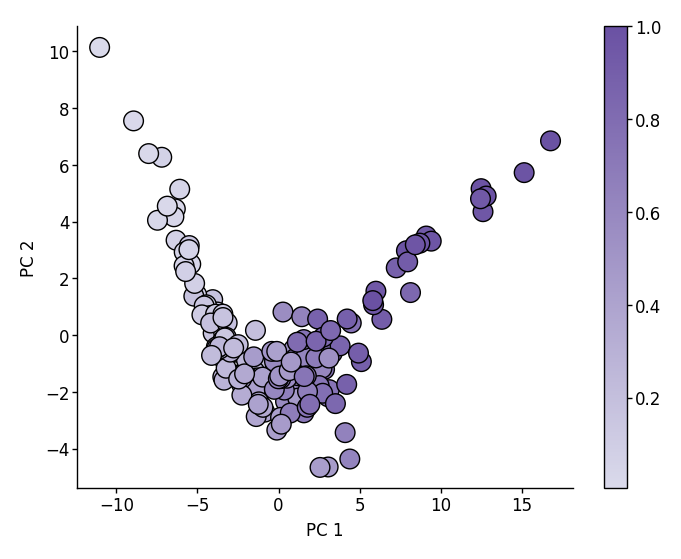

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(4,3) 
im=plt.scatter(x=pc_df[0], y=pc_df[1], 
                cmap=cmm,
                s=50,
                edgecolor='black',
                c=pc_df['psd'], 
                linewidth=0.5,
                #norm='log',
               )
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
sns.despine()
ax.get_legend().remove()
cb=fig.colorbar(im,ax=ax)
c = PlotConfig()
plt.savefig(c.dana_save_path / "age_vs_behavioral_age"/ 'pca_ontogeny_psd.pdf', bbox_inches='tight')

In [10]:
#PC1 correlation
from scipy import stats
[c,p] = stats.spearmanr(pc_df[0], pc_df['psd'])
print(c)

0.9663973951887298


findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

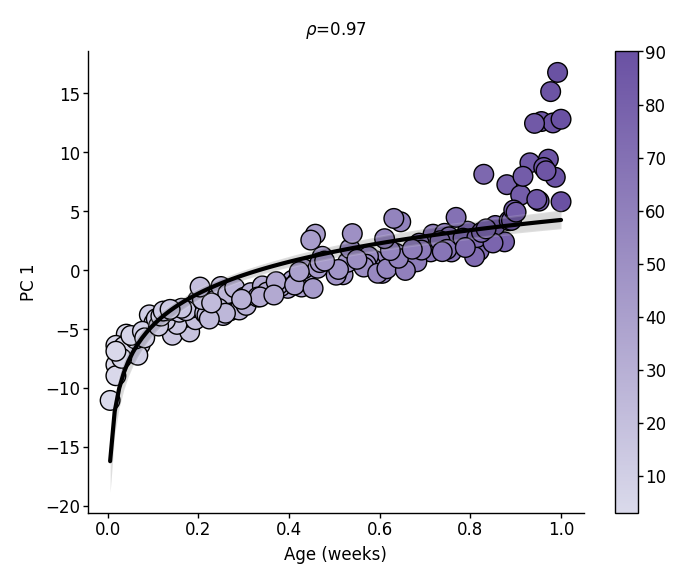

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(4,3) 
plt.scatter(x=pc_df['psd'], y=pc_df[0], 
            s=50, 
            c=pc_df['psd'], 
            edgecolor='black',
            linewidth=0.5,
            cmap=cmm)
ax = sns.regplot(data=pc_df, x='psd', y=pc_df[0], scatter=False, color='black', logx=True)
ax.set(xlabel='Age (weeks)', ylabel='PC 1')
plt.title(f'$\\rho$={c:0.2f}')
norm = plt.Normalize(pc_df['age'].min(), pc_df['age'].max())
sns.despine()
sm = plt.cm.ScalarMappable(cmap=cmm, norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
ax.figure.colorbar(sm)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

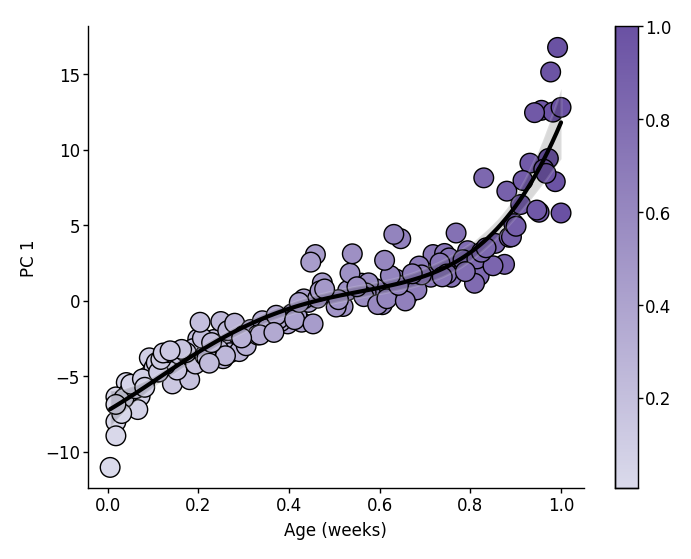

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(4,3) 
im = plt.scatter(x=pc_df['psd'], y=pc_df[0], 
            s=50, 
            c=pc_df['psd'], 
            edgecolor='black',
            linewidth=0.5,
            #norm='log',
            cmap=cmm)
cb=fig.colorbar(im,ax=ax)

ax = sns.regplot(data=pc_df, x='psd', y=pc_df[0], scatter=False, color='black', 
                 #logx=True, 
                 order=4)
ax.set(xlabel='Age (weeks)', ylabel='PC 1')
sns.despine()

In [13]:
#c = PlotConfig()
#saver(fig,'pca_ontogeny_pre_correlation.pdf', tight_layout=True);
c = PlotConfig()
fig.savefig(c.dana_save_path / "age_vs_behavioral_age"/ 'pca_ontogeny_psd.pdf')

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

In [19]:
## pca over bins

In [20]:
df_psd['bins'] = pd.qcut(df_psd['pseudotime_rank'], len(ages.unique()),labels=False)
pc_df['psd'] = df_psd['pseudotime_rank']
pc_df['bins'] = df_psd['bins']

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


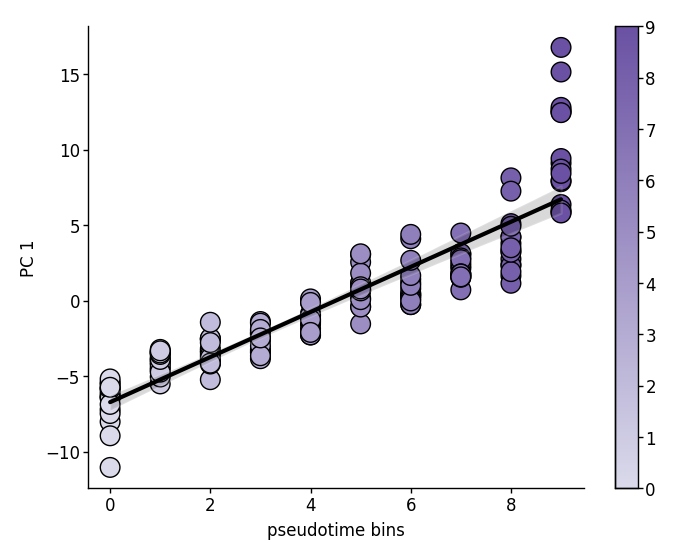

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(4,3) 
im = plt.scatter(x=pc_df['bins'], y=pc_df[0], 
            s=50, 
            c=pc_df['bins'], 
            edgecolor='black',
            linewidth=0.5,
            #norm='log',
            cmap=cmm)
cb=fig.colorbar(im,ax=ax)

ax = sns.regplot(data=pc_df, x='bins', y=pc_df[0], scatter=False, color='black', 
                 #logx=True, 
                 #order=4
                )
ax.set(xlabel='pseudotime bins', ylabel='PC 1')
sns.despine()

In [47]:
#c = PlotConfig()
#saver(fig,'pca_ontogeny_pre_correlation.pdf', tight_layout=True);
c = PlotConfig()
fig.savefig(c.dana_save_path / "age_vs_behavioral_age"/ 'pca_corr_psd_bins.pdf')

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

In [23]:
mapdr = {0: 3, 
       1: 5, 
       2: 7,
       3: 9,
       4: 12,
       5: 24,
       6: 36,
       7: 52,
       8: 78,
       9: 90,
       }

In [24]:
psd_bins = df_psd['bins']
psd_bins = [mapdr[item] for item in psd_bins]
#pc_df['bins'] = df_psd['bins']
pc_df['mapped_bins'] = psd_bins

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

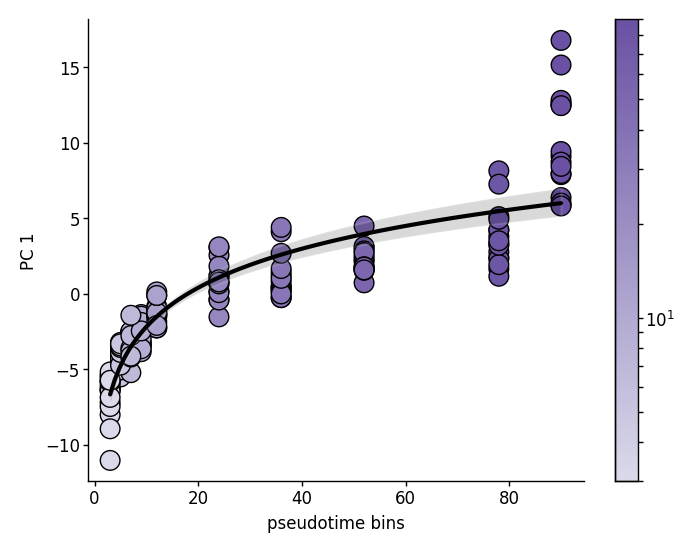

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(4,3) 
im = plt.scatter(x=pc_df['mapped_bins'], y=pc_df[0], 
            s=50, 
            c=pc_df['mapped_bins'], 
            edgecolor='black',
            linewidth=0.5,
            norm='log',
            cmap=cmm)
cb=fig.colorbar(im,ax=ax)

ax = sns.regplot(data=pc_df, x='mapped_bins', y=pc_df[0], scatter=False, color='black', 
                 logx=True, 
                 #order=4
                )
ax.set(xlabel='pseudotime bins', ylabel='PC 1')
sns.despine()

In [27]:
#c = PlotConfig()
#saver(fig,'pca_ontogeny_pre_correlation.pdf', tight_layout=True);
c = PlotConfig()
fig.savefig(c.dana_save_path / "age_vs_behavioral_age"/ 'pca_corr_psd_remapped_bins.pdf')

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

In [ ]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, slope_std_error = linregress(np.log(x), np.log(y))
